## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist.data_utils import load_data

## K-Nearest Neighbor Implementation

In [125]:
class KNN:
    def train(self, X, y):
        self.X = X
        self.Y = y

    def inference(self, X_test, k=1, dist_metric='l2'):
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred
    
    def compute_shape(self, X_test):
        n = len(X_test)
        X_train_t = np.tile(self.X, (n,1))
        X_test_t = np.repeat(X_test, len(self.X), axis=0 )
        X_train_norm = np.sqrt(np.sum(np.square(self.X)))
        X_test_norm = np.sqrt(np.sum(np.square(X_test)))
        a = ((np.sum((X_train_t * X_test_t),axis=1)) / (X_train_norm * X_test_norm))
        print(np.shape(a))
    
    def compute_distance(self, X_test, dist_metric):        
        n = len(X_test)
        X_train_t = np.tile(self.X, (n,1))
        X_test_t = np.repeat(X_test, len(self.X), axis=0)
        
        if dist_metric=='dot':
            dists = (-np.sum((X_train_t * X_test_t),axis=1)).reshape(n, len(self.X))
        elif dist_metric=='cos':
            #X_train_norm = np.sqrt(np.sum(np.square(self.X), axis=1))
           #X_test_norm = np.sqrt(np.sum(np.square(X_test), axis=1))
            

            dists = (1 - (np.sum((X_train_t * X_test_t),axis=1)) / (np.linalg.norm(X_train_t) * np.linalg.norm(X_test_t))).reshape(n, len(self.X))

        elif dist_metric=='l2':          
            dists = np.sqrt(np.sum((X_train_t-X_test_t)**2,axis=1)).reshape(n, len(self.X))
        return dists

    def predict_labels(self, X_test, dists, k):
        N = len(X_test)
        y_hat = np.zeros(N)
        arg_dist = dists.argsort()
        for i in range(N):
            row = arg_dist[i]
            k_neighbor = self.Y[row[:k]]
            target, cnt = np.unique(k_neighbor, return_counts=True)
            y_hat[i] = target[np.argmax(cnt)]
        return y_hat


    def evaluate(self, y, y_hat):
        
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading

In [126]:
def sample_data(X, y, count):
    mask = np.random.choice(X.shape[0], count, replace=False)
    X_sampled = X[mask]
    y_sampled = y[mask]
    return X_sampled, y_sampled

In [127]:
num_train_data = 1000
num_test_data = 200

X_train_src, y_train_src, X_test_src, y_test_src = load_data(one_hot_encoding=False) # Training data is flattened when it is loaded
X_train, y_train = sample_data(X_train_src, y_train_src, num_train_data)
X_test, y_test = sample_data(X_test_src, y_test_src, num_test_data)

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


In [128]:
np.shape(X_test)
len(X_train)

1000

## Model Training & Evaluation

In [129]:
model = KNN()
model.train(X_train, y_train)

In [130]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.895


## Experiments

In [132]:
# Modify the number of k's and metrics to try as you want
num_ks = 50 #원래는 50이다!!!!
metrics = ['dot', 'cos', 'l2']

In [133]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50



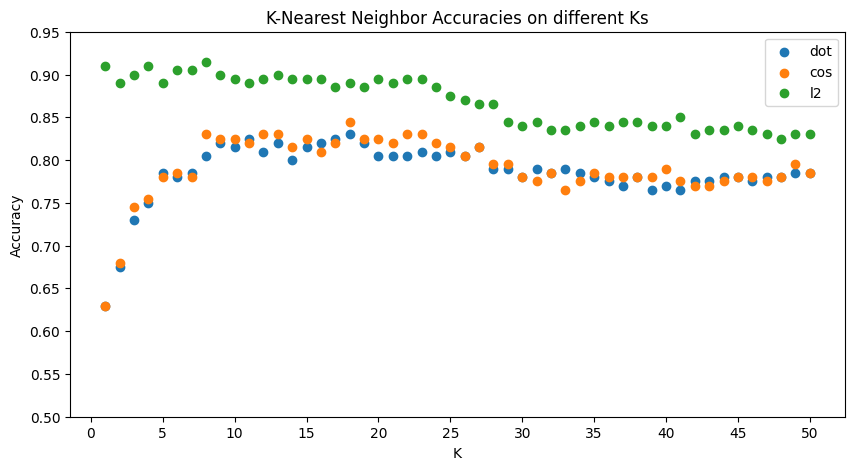

In [134]:
# Visualize the result
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [71]:
### 
# Question (d)
# Briefly report what you observe in the plot above.
'''
위에서 plot된 결과를 보면 일단 dist_metric = l2 일때 제일 성능이 좋게 나오는 것을 알 수 있다. l2의 경우 k가 대략 10이하일 때까지는 accuracy가
상승하기도, 하락하기도 하는데 그 이후에는 전반적으로 하락하는 추세이다. 이는 l2 뿐만 아니라 다른 dist_metric인 경우에도 대체적으로 비슷한 추세이며, 
아마 이와 같은 현상의 이유로는 k가 증가할수록 overfitting이 일어나기 때문이다.

dist_metric이 cos일때와 dot일 때 보면 accuracy가 크게 차이가 크게 나지 않는다. 아무래도 cosine similarity와 dot product를 계산하는 식에서 사실상 
벡터의 크기를 고려하는지의 여부 말고는 나머지 부분이 같기 때문에 거의 비슷하게 나오는 것으로 보인다. 위에 plot으로 보아서는 해당 dataset에서는 cos과 
dot중 어떤 metric이 더 성능이 좋았는지 구분하기는 어려워 보인다.
'''
###

  Write your answer to (d) in this cell.

In [ ]:
### 
# Question (e)
# In what kind of dataset dot product(not cosine similarity) will serve as a good metric?
'''
dot product는 3d 공간에 있는 벡터 연산을 할 때 좋은 성능을 보일 확률이 높아보인다. dot product의 제일 큰 장점이자 특징 중 하나는 벡터 간의 각도를 
consider한다는 것이다. 그렇기에 단순히 어떤 값의 크기뿐만 아니라 값들 간의 위치 간의 차이가 중요한 3차원의 공간에서 dot product를 dist_metric으로
사용하면 좋은 성능을 보일 것이다.
'''
###

  Write your answer to (e) in this cell.